AI-Nc
Deep Learning project group members names

1) Khaled adel

2) mahmoud mohsen

3) muhab mohammed

4) muhammed raafat

5) mustafa mohamed 

#Computer vision project
### State Farm Distracted Driver Detection
###Can computer vision spot distracted drivers?

# Import libraries

In [1]:
from tensorflow.keras import models,layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import pandas as pd
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from PIL import Image

# Loading data

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mustafamohamed99","key":"908a8c2d30c190784805ecdae59c36b7"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zusmani/pakistan-toshakhana-files                                  Pakistan ToshaKhana Files                             1MB  2023-03-15 16:25:43           2288         95  1.0              
ramkrijal/tomato-daily-prices                                      Tomato Daily Prices                                  10KB  2023-03-10 15:39:14           1210         36  1.0              
themrityunjaypathak/covid-cases-and-deaths-worldwide               Covid Cases and Deaths WorldWide                      8KB  2023-02-01 12:22:51          14155        467  1.0              
datascientistanna/customers-dataset          

In [5]:
!kaggle competitions download -c state-farm-distracted-driver-detection

100% 4.00G/4.00G [03:09<00:00, 25.4MB/s]
100% 4.00G/4.00G [03:09<00:00, 22.7MB/s]


In [6]:
!unzip /content/state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

In [7]:
img_directory_train = '/content/imgs/train'
img_directory_val = '/content/imgs/test'


In [8]:
dataset_path = '/content/dataset'

train_dir = '/content/imgs/' + "train/"
valid_dir = '/content/imgs/' + "val/"
test_dir  = '/content/imgs/' + 'test/' 



In [9]:
driver_img_list_df=pd.read_csv('/content/driver_imgs_list.csv')

# Visuallizing different classes

In [10]:
classes = os.listdir(train_dir)
class_dict = {'c0' : "safe driving",
              'c1' : "texting - right",
              'c2' : "talking on the phone - right",
              'c3' : "texting - left",
              'c4' : "talking on the phone - left",
              'c5' : "operating the radio",
              'c6' : "drinking",
              'c7' : "reaching behind",
              'c8' : "hair and makeup",
              'c9' : "talking to passenger"}



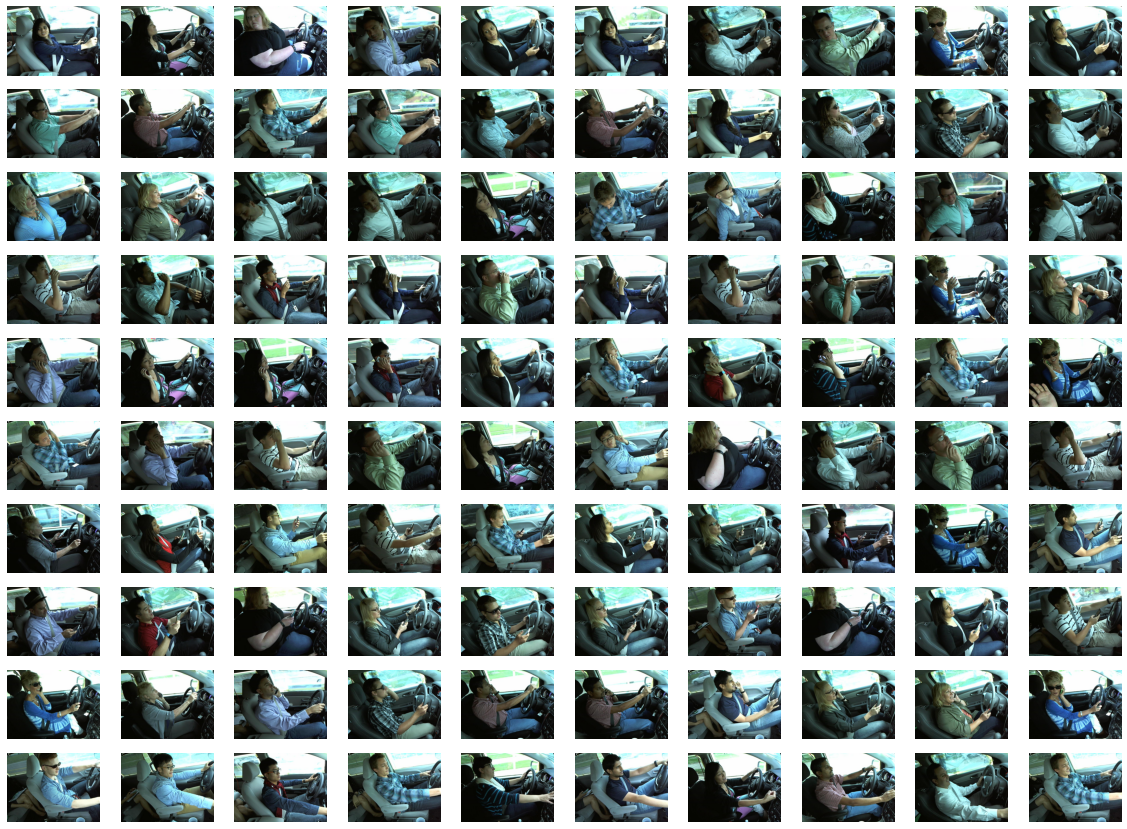

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(20, 15))
# plt.subplots_adjust(wspace=0.1, hspace=0.1)
for i, class_name in enumerate(os.listdir(train_dir)):
    if class_name not in class_dict:
        continue
    class_path = os.path.join(train_dir, class_name)
    images = os.listdir(class_path)[:10] 
    for k, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)
        axs[i, k].imshow(image)
        axs[i, k].axis('off')
plt.show()

In [ ]:
driver_img_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB


# Dividing the data

In [11]:
for c in os.listdir(img_directory_train):
    shutil.move(os.path.join(img_directory_train,c), os.path.join(img_directory_train,class_dict[f'{c}']))

In [12]:
for c in os.listdir(train_dir):
    os.makedirs(valid_dir + '/' + c, exist_ok=True)
    os.makedirs(test_dir + '/' + c, exist_ok=True)
    
    c_train_dir = train_dir + c
    c_len = len([sample for sample in os.listdir(c_train_dir)])
    print(c_len)
    
    for sample in random.sample(os.listdir(c_train_dir) , int(float(0.1) * c_len)):
        shutil.move(c_train_dir + '/' + sample, valid_dir + c)
        
    for sample in random.sample(os.listdir(c_train_dir) , int(float(0.1) * c_len)):
        shutil.move(c_train_dir + '/' + sample, test_dir + c)

2312
1911
2002
2489
2346
2129
2326
2325
2267
2317


In [13]:
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [14]:
batch_size = 32
train_generator = test_datagen.flow_from_directory(directory = train_dir,shuffle = True, 
                                                   batch_size = batch_size)

val_generator = test_datagen.flow_from_directory(directory = valid_dir,shuffle = True, 
                                                   batch_size = batch_size)

test_generator = test_datagen.flow_from_directory(directory= test_dir,shuffle = False, 
                                                   batch_size = 1)

Found 17950 images belonging to 10 classes.
Found 2237 images belonging to 10 classes.
Found 2237 images belonging to 10 classes.


# Model

In [ ]:
model = models.Sequential()
model.add(Flatten(input_shape=(256,256,3)))
model.add(Dense(1024,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_6 (Dense)             (None, 1024)              201327616 
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 201,986,314
Trainable params: 201,986,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
          validation_data=val_generator,
          steps_per_epoch=350,
          epochs=15,
          validation_steps= 50)

Epoch 1/15
350/350 [==============================] - 79s 218ms/step - loss: 8.6679 - accuracy: 0.4830 - val_loss: 0.7301 - val_accuracy: 0.7706
Epoch 2/15
350/350 [==============================] - 76s 218ms/step - loss: 0.4631 - accuracy: 0.8543 - val_loss: 0.2275 - val_accuracy: 0.9250
Epoch 3/15
350/350 [==============================] - 74s 212ms/step - loss: 0.3779 - accuracy: 0.8823 - val_loss: 0.8202 - val_accuracy: 0.7538
Epoch 4/15
350/350 [==============================] - 76s 216ms/step - loss: 0.4304 - accuracy: 0.8629 - val_loss: 0.3151 - val_accuracy: 0.9050
Epoch 5/15
350/350 [==============================] - 75s 214ms/step - loss: 0.2654 - accuracy: 0.9133 - val_loss: 0.1624 - val_accuracy: 0.9513
Epoch 6/15
350/350 [==============================] - 76s 216ms/step - loss: 0.2553 - accuracy: 0.9183 - val_loss: 0.3072 - val_accuracy: 0.9025
Epoch 7/15
350/350 [==============================] - 75s 215ms/step - loss: 0.1840 - accuracy: 0.9399 - val_loss: 0.1062 - val_ac

In [ ]:
_, test_acc = model.evaluate(test_generator)
print(test_acc)

2237/2237 [==============================] - 19s 8ms/step - loss: 0.0879 - accuracy: 0.9687
0.9687080979347229


In [23]:
def plot_performnce(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

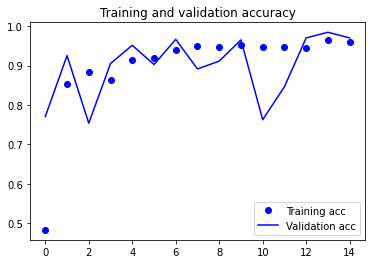

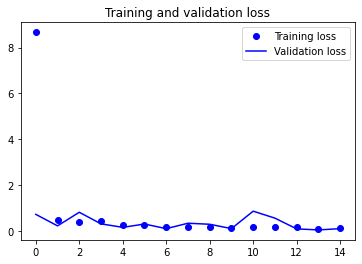

In [ ]:
plot_performnce(history)

# CNN model

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
history = model.fit(train_generator,
          steps_per_epoch=350,    
          validation_data = val_generator,
          epochs=10,
          validation_steps= 50)

Epoch 1/10
350/350 [==============================] - 89s 217ms/step - loss: 0.5731 - accuracy: 0.8232 - val_loss: 0.0662 - val_accuracy: 0.9844
Epoch 2/10
350/350 [==============================] - 75s 214ms/step - loss: 0.0456 - accuracy: 0.9882 - val_loss: 0.0346 - val_accuracy: 0.9912
Epoch 3/10
350/350 [==============================] - 74s 211ms/step - loss: 0.0264 - accuracy: 0.9929 - val_loss: 0.0628 - val_accuracy: 0.9844
Epoch 4/10
350/350 [==============================] - 76s 218ms/step - loss: 0.0219 - accuracy: 0.9938 - val_loss: 0.0274 - val_accuracy: 0.9925
Epoch 5/10
350/350 [==============================] - 76s 217ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.0248 - val_accuracy: 0.9931
Epoch 6/10
350/350 [==============================] - 76s 216ms/step - loss: 0.0145 - accuracy: 0.9965 - val_loss: 0.0354 - val_accuracy: 0.9919
Epoch 7/10
350/350 [==============================] - 76s 218ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0370 - val_ac

In [ ]:
_, test_acc = model.evaluate(test_generator)
print(test_acc)

2237/2237 [==============================] - 16s 7ms/step - loss: 0.0217 - accuracy: 0.9955
0.9955297112464905


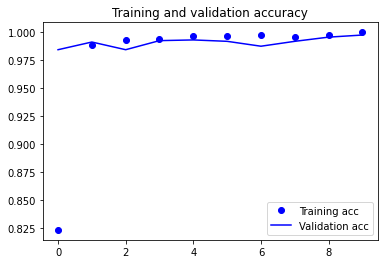

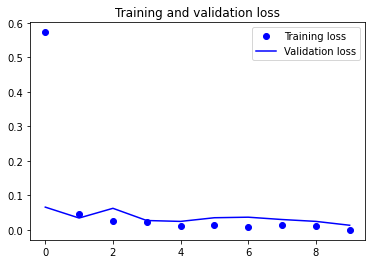

In [ ]:
plot_performnce(history)

# data augmentation

In [18]:
train_datagen_augmentation = ImageDataGenerator(rescale=1 / 255.0,
                                                zoom_range=0.05,
                                                width_shift_range=0.05,
                                                height_shift_range=0.05,
                                                shear_range=0.05,
                                                fill_mode="nearest")

In [19]:
train_generated_augmented = train_datagen_augmentation.flow_from_directory(directory = train_dir,shuffle = True, 
                                                   batch_size = 32)

Found 17950 images belonging to 10 classes.


In [20]:
history = model.fit(x = train_generated_augmented,
          steps_per_epoch=250,
          epochs=10,
          validation_data = val_generator,
          validation_steps= 50,
)

Epoch 1/10
250/250 [==============================] - 159s 587ms/step - loss: 1.8542 - accuracy: 0.3880 - val_loss: 0.7138 - val_accuracy: 0.7688
Epoch 2/10
250/250 [==============================] - 146s 586ms/step - loss: 0.7434 - accuracy: 0.7582 - val_loss: 0.3657 - val_accuracy: 0.8969
Epoch 3/10
250/250 [==============================] - 147s 590ms/step - loss: 0.4947 - accuracy: 0.8431 - val_loss: 0.3183 - val_accuracy: 0.8969
Epoch 4/10
250/250 [==============================] - 148s 594ms/step - loss: 0.3376 - accuracy: 0.8938 - val_loss: 0.1629 - val_accuracy: 0.9519
Epoch 5/10
250/250 [==============================] - 148s 590ms/step - loss: 0.2892 - accuracy: 0.9129 - val_loss: 0.1623 - val_accuracy: 0.9556
Epoch 6/10
250/250 [==============================] - 151s 604ms/step - loss: 0.2469 - accuracy: 0.9229 - val_loss: 0.1095 - val_accuracy: 0.9631
Epoch 7/10
250/250 [==============================] - 151s 603ms/step - loss: 0.2125 - accuracy: 0.9351 - val_loss: 0.1144 -

In [45]:
_, test_acc = model.evaluate(test_generator)
print(test_acc)

2237/2237 [==============================] - 28s 12ms/step - loss: 1.0325 - accuracy: 0.7917
0.7916852831840515


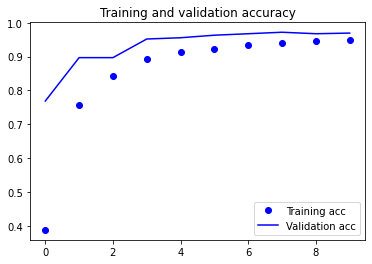

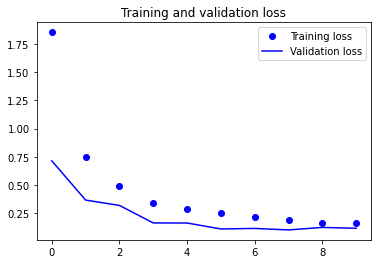

In [24]:
plot_performnce(history)

# Transfer Learning

In [25]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128,3))
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [41]:
model = models.Sequential()
model.add(vgg)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [42]:

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
____________________________________

In [44]:
history = model.fit(train_generator,
          steps_per_epoch=250,
          epochs=15,
          validation_data=val_generator,
          validation_steps= 50)

Epoch 1/15
250/250 [==============================] - 76s 299ms/step - loss: 2.2639 - accuracy: 0.1750 - val_loss: 2.2140 - val_accuracy: 0.3212
Epoch 2/15
250/250 [==============================] - 65s 259ms/step - loss: 2.1737 - accuracy: 0.3181 - val_loss: 2.1247 - val_accuracy: 0.3938
Epoch 3/15
250/250 [==============================] - 76s 302ms/step - loss: 2.0831 - accuracy: 0.4306 - val_loss: 2.0444 - val_accuracy: 0.4187
Epoch 4/15
250/250 [==============================] - 66s 263ms/step - loss: 1.9910 - accuracy: 0.4831 - val_loss: 1.9489 - val_accuracy: 0.4013
Epoch 5/15
250/250 [==============================] - 66s 263ms/step - loss: 1.8902 - accuracy: 0.5328 - val_loss: 1.8255 - val_accuracy: 0.6137
Epoch 6/15
250/250 [==============================] - 65s 259ms/step - loss: 1.7887 - accuracy: 0.5813 - val_loss: 1.7352 - val_accuracy: 0.5875
Epoch 7/15
250/250 [==============================] - 66s 264ms/step - loss: 1.6839 - accuracy: 0.6202 - val_loss: 1.6451 - val_ac

In [30]:
_, test_acc = model.evaluate(test_generator)
print(test_acc)

2237/2237 [==============================] - 27s 12ms/step - loss: 1.2717 - accuracy: 0.7371
0.7371479868888855


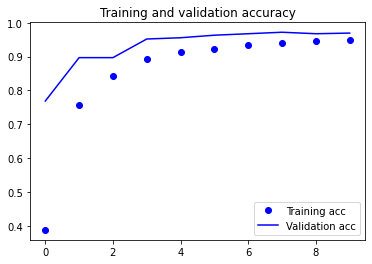

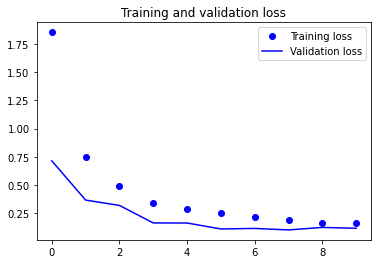

In [31]:
plot_performnce(history)